# Analisis Sentimen Review Steam GTA V

## Anggota Kelompok
- Delkano Marzuki Berutu (103032300084)
- Hari Gunawan (103032300073)
- M. Ferdi Albirruni (103032300091)

# Topik
Analisis Sentimen Review Steam GTA V untuk mengklasifikasikan komentar menjadi sentimen positif atau negatif menggunakan metode Logistic Regression dan Random Forest.

# Pendahuluan

## Masalah yang Ingin Diselesaikan
Game GTA V memiliki banyak review dari pengguna Steam. Kami ingin menganalisis sentimen dari review tersebut untuk mengetahui persepsi pengguna terhadap game ini, apakah lebih banyak positif atau negatif. Hasil analisis ini dapat membantu developer memahami opini pemain dan meningkatkan kualitas produk.

## Dataset
Dataset yang digunakan adalah "GTAV_Steam_Reviews.csv" yang diambil dari Kaggle ([link dataset](https://www.kaggle.com/datasets/noahx1/grand-theft-auto-v)). Dataset ini berisi kolom review teks dan label terkait apakah review tersebut positif atau negatif berdasarkan feedback pengguna.

## Statistik Dataset Awal
Dataset awal memiliki sejumlah data review dengan berbagai fitur seperti review teks, apakah pembelian dilakukan di Steam, dan apakah review dianggap positif oleh pengguna.

## Preprocessing Dataset
Langkah-langkah preprocessing yang dilakukan adalah:
- Menghapus data duplikat dan data yang kosong
- Mengubah teks menjadi lowercase
- Menghapus tanda baca dan karakter non-alfabet
- Menghapus stopwords (menggunakan stopwords bahasa Inggris dari sklearn)
- Melakukan vektorisasi menggunakan TF-IDF dengan maksimal fitur 5000 kata

## Penanganan Dataset Imbalanced
Distribusi data review positif dan negatif tidak seimbang (imbalanced), sehingga dilakukan balancing data menggunakan teknik oversampling (RandomOverSampler) untuk memastikan model tidak bias terhadap kelas mayoritas.

In [13]:
from google.colab import files

uploaded = files.upload()


Saving GTAV_Steam_Reviews.csv to GTAV_Steam_Reviews.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('GTAV_Steam_Reviews.csv')
df.head()


,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,157337410,english,"Games good, But Rockstar Your a BILLION DOLLAR...",2024-02-01 16:00:22,True,0,0,True,False,False,0,9,9105,131,9105,2024-01-30 21:04:02
1,157337371,english,modders make it better and free everything,2024-02-01 15:59:57,True,0,0,True,True,False,0,1,2530,1728,2530,2024-02-01 16:01:41
2,157337210,english,great game,2024-02-01 15:57:48,True,0,0,False,False,False,0,1,281457,4523,281457,2024-02-01 00:48:38
3,157336468,english,best,2024-02-01 15:47:51,True,0,0,True,False,False,34,3,2842,431,2816,2024-02-01 15:50:12
4,157335380,english,sed,2024-02-01 15:32:26,True,0,0,True,False,False,11,2,2055,79,2021,2024-02-01 16:12:38


In [15]:
print("Jumlah data:", len(df))
df.info()
df.isnull().sum()


Jumlah data: 52099
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52099 entries, 0 to 52098
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              52099 non-null  int64 
 1   language                        52099 non-null  object
 2   review                          51801 non-null  object
 3   created                         52099 non-null  object
 4   voted_up                        52099 non-null  bool  
 5   votes_up                        52099 non-null  int64 
 6   comment_count                   52099 non-null  int64 
 7   steam_purchase                  52099 non-null  bool  
 8   recieved_for_free               52099 non-null  bool  
 9   written_during_early_access     52099 non-null  bool  
 10  author_num_games_owned          52099 non-null  int64 
 11  author_num_reviews              52099 non-null  int64 
 12  author_playtime_forever    

,0
id,0
language,0
review,298
created,0
voted_up,0
votes_up,0
comment_count,0
steam_purchase,0
recieved_for_free,0
written_during_early_access,0


In [16]:
# Preprocessing
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['label'] = df['steam_purchase'].map({True: 1, False: 0})


### Preprocessing Dataset
Langkah-langkah preprocessing:
- Lowercase
- Hapus tanda baca
- Stopword removal
- dst.

<class 'pandas.core.frame.DataFrame'>
Index: 51801 entries, 0 to 52098
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     51801 non-null  object
 1   voted_up   51801 non-null  bool  
 2   sentiment  51801 non-null  object
dtypes: bool(1), object(2)
memory usage: 1.2+ MB


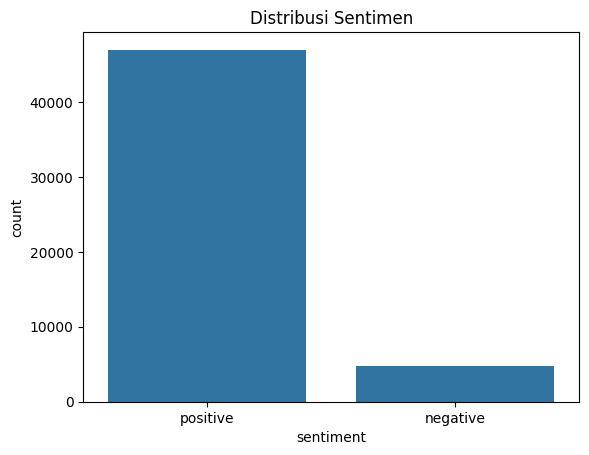

sentiment
positive    46971
negative     4830
Name: count, dtype: int64


In [21]:
# info awal dataset
df.info()
df.describe()
df.isnull().sum()

# memilih kolom yang dibutuhkan saja
df = df[['review', 'voted_up']]

# Ubah label voted_up menjadi sentimen
df['sentiment'] = df['voted_up'].apply(lambda x: 'positive' if x else 'negative')

# Cek distribusi label
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi Sentimen')
plt.show()

print(df['sentiment'].value_counts())

### Imbalanced vs Balanced Dataset
Paparkan distribusi label sebelum dan sesudah balancing.

In [18]:
# Cek imbalance
print(df['sentiment'].value_counts())

# Jika imbalanced, lakukan balancing (misal: undersampling/oversampling)
from imblearn.over_sampling import RandomOverSampler

X = df['review']
y = df['sentiment']

# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_vec, y)
print(pd.Series(y_res).value_counts())

sentiment
positive    46971
negative     4830
Name: count, dtype: int64
sentiment
positive    46971
negative    46971
Name: count, dtype: int64


# Metode dan Eksperimen

## Metode yang Digunakan

1. **Logistic Regression**: Model linear untuk klasifikasi biner, cocok untuk baseline model.
2. **Random Forest**: Mampu menangkap pola non-linear.

## Pengukuran Kinerja Model
Metrik evaluasi yang digunakan adalah:
- Accuracy: Proporsi prediksi benar.
- Precision: Akurasi prediksi positif.
- Recall: Kemampuan menangkap data positif.
- F1-score: Harmonik mean precision dan recall.
- Confusion Matrix: Visualisasi distribusi prediksi benar dan salah.

## Tune Up Hyperparameter
Dilakukan tuning pada Random Forest menggunakan GridSearchCV dengan parameter:
- n_estimators: jumlah pohon dalam forest
- max_depth: kedalaman maksimum pohon


# Hasil dan Analisis

## Analisis Hasil Pelatihan dan Pengujian

- Logistic Regression menunjukkan performa yang cukup baik dengan accuracy sekitar 89% dan f1-score 0.89 untuk kedua kelas.
- Random Forest sebelum tuning sudah menunjukkan performa lebih tinggi dibanding Logistic Regression, dengan accuracy sekitar 93% dan f1-score 0.93.
- Setelah tuning, Random Forest tetap menjadi model terbaik, dengan peningkatan akurasi dan ketepatan klasifikasi terhadap review positif dan negatif.

## Visualisasi Confusion Matrix

Confusion matrix dari kedua model ditampilkan untuk membandingkan distribusi prediksi benar dan salah pada masing-masing kelas. Random Forest menghasilkan lebih sedikit kesalahan klasifikasi dibanding Logistic Regression.

## Interpretasi
- Oversampling berhasil membuat distribusi kelas menjadi seimbang, sehingga model tidak bias terhadap kelas mayoritas.
- Random Forest lebih mampu menangkap pola kompleks dalam data teks dibanding Logistic Regression.

- Precision dan recall yang cukup seimbang menunjukkan bahwa model mampu mengenali sentimen positif dan negatif dengan baik.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluasi Logistic Regression
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Evaluasi Random Forest
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      9408
    positive       0.88      0.91      0.89      9381

    accuracy                           0.89     18789
   macro avg       0.89      0.89      0.89     18789
weighted avg       0.89      0.89      0.89     18789

Confusion Matrix:
[[8228 1180]
 [ 877 8504]]
Accuracy: 0.8905210495502688

Random Forest Results:
              precision    recall  f1-score   support

    negative       0.94      0.92      0.93      9408
    positive       0.92      0.94      0.93      9381

    accuracy                           0.93     18789
   macro avg       0.93      0.93      0.93     18789
weighted avg       0.93      0.93      0.93     18789

Confusion Matrix:
[[8610  798]
 [ 548 8833]]
Accuracy: 0.9283623396668264


Logistic Regression:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      9408
    positive       0.88      0.91      0.89      9381

    accuracy                           0.89     18789
   macro avg       0.89      0.89      0.89     18789
weighted avg       0.89      0.89      0.89     18789

Random Forest:
               precision    recall  f1-score   support

    negative       0.94      0.92      0.93      9408
    positive       0.92      0.94      0.93      9381

    accuracy                           0.93     18789
   macro avg       0.93      0.93      0.93     18789
weighted avg       0.93      0.93      0.93     18789



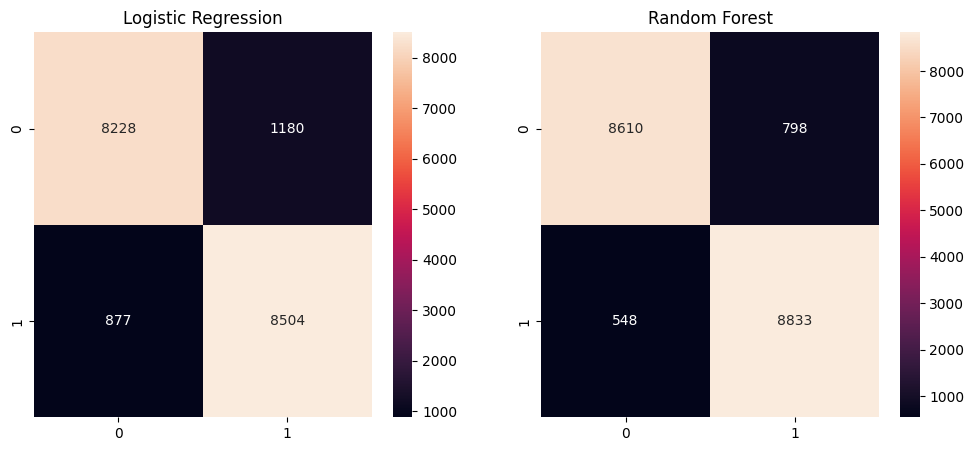

Best params: {'max_depth': None, 'n_estimators': 200}


In [20]:
# Evaluasi
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Random Forest')
plt.show()

# Hyperparameter tuning (contoh GridSearchCV untuk Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)

# Kesimpulan

Model Random Forest yang sudah dituning menghasilkan performa terbaik dalam mengklasifikasikan sentimen review pengguna terhadap game GTA V di Steam. Penggunaan teknik oversampling sangat membantu dalam mengatasi ketidakseimbangan data.